# Week 2: 2016/01/18-22

In [1]:
from tock import *

# Monday reading

Read 1.1.

Sipser uses an automatic door to illustrate a finite automaton. The door is the type that swings open (towards the rear pad), not the type that slides open. This example is good because its state is something visible. But this automaton doesn't have accept states, because the input string has no end and the automaton's job is not to accept or reject strings. So the door is best thought of as an analogy more than a strict example.

The section "The regular operations" is slightly unusual. These closure properties are important, and where he's going with this is that these closure properties will be used to prove that any regular expression can be compiled into a finite automaton. But using DFAs, this proof is not easy and he gives up halfway. Sipser uses this as a motivation for nondeterminism, which is introduced in the next section. The proof of both Theorem 1.25 and 1.26 will turn out to be very easy.

On the other hand, the proof of Theorem 1.25 has a footnote (3) regarding closure under intersection. This is an important result and the Cartesian product construction _is_ the standard way to prove it.

# Tuesday class

Homework 1 is due this evening!

## Deterministic finite automata

In lecture notes I'll be using a toolkit called [Tock], which displays and runs automata inside IPython notebooks. You are welcome to use it to tinker with automata or to write your homework assignments.

Tock reads files in CSV format (or in a graph format called TGF):

[Tock]: https://github.com/davidweichiang/tock

In [2]:
%cat dfa-m1.csv

    , 0  , 1
>q1 , q1 , q2
@q2 , q3 , q2
 q3 , q2 , q2


In [3]:
m1 = read_csv('dfa-m1.csv')

Then you can display it as a table or as a graph:

In [4]:
to_table(m1)

,0,1
>q1,q1,q2
@q2,q3,q2
q3,q2,q2


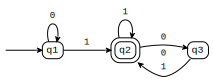

In [5]:
to_graph(m1)

And you can run it on a string:

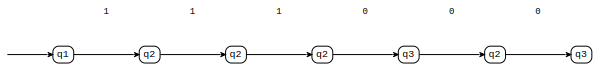

In [6]:
run(m1, "1 1 1 0 0 0")

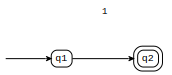

In [24]:
run(m1, "1")

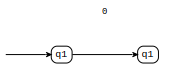

In [25]:
run(m1, "0")

Above is a graph that represents the run of the automaton on an input string. Each node is a configuration of the automaton (that is, being in a particular state at a particular time), and above the nodes are the input symbols that are read. Since last node has a double circle, the automaton is in the accept state at the end of the input.

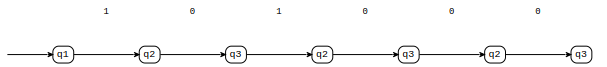

In [7]:
run(m1, "1 0 1 0 0 0")

This time, the automaton rejected the string (because the last node does not have a double circle).

More example DFAs from the book:

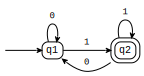

In [8]:
m2 = read_csv('dfa-m2.csv')
m2

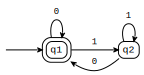

In [9]:
m3 = read_csv('dfa-m3.csv')
m3

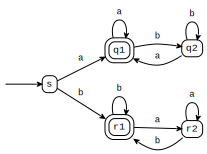

In [10]:
m4 = read_csv('dfa-m4.csv')
m4

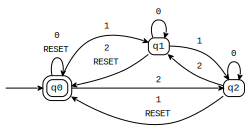

In [11]:
m5 = read_csv('dfa-m5.csv')
m5

**Question.** Write a DFA that recognizes legal C identifiers (e.g., variable names). For simplicity, assume the alphabet $\Sigma=\{\mathtt{f},\mathtt{i},\mathtt{n},\mathtt{t},\mathtt{0}\}$. Don't worry about reserved words yet.

**Question.** Write another DFA that recognizes C reserved words. For simplicity, just handle the reserved words $\mathtt{if}$ and $\mathtt{int}$.

**Question.** Modify the last DFA so that it recognizes everything **but** C reserved words.

## The product construction

The proof of Theorem 1.25 (closure under union) involves a construction sometimes called the _product construction_. It is used in a lot of proofs. For instance, its most well-known application is probably to prove closure under intersection (footnote 3). The basic idea is that you can use a finite automaton to simulate two (or more) other finite automata.

**Question.** Combine the identifier DFA and the no-reserved-word DFA into a single DFA.

# Wednesday reading

Read 1.2.

# Thursday class

## Nondeterministic finite automata

Turing machines and deterministic finite automata were inspired by mechanical devices. It's easy to imagine building them, and many people have. But a nondeterministic automaton seems profoundly unnatural -- like [bilocation]. However, mathematically, nondeterminism is pretty natural concept. A NFA accepts a string iff there exists an accepting path for it; when a DFA accepts a string, there exists a _unique_ path for it. Thought of this way, the NFA actually has the simpler definition. We will come back to the idea of nondeterminism repeatedly, but it will become of paramount importance in Unit IV.

[bilocation]: https://en.wikipedia.org/wiki/Pio_of_Pietrelcina

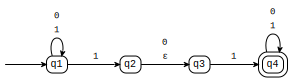

In [12]:
n1 = read_csv('nfa-n1.csv')
to_graph(n1)

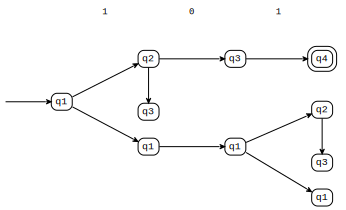

In [28]:
run(n1, "1 0 1")

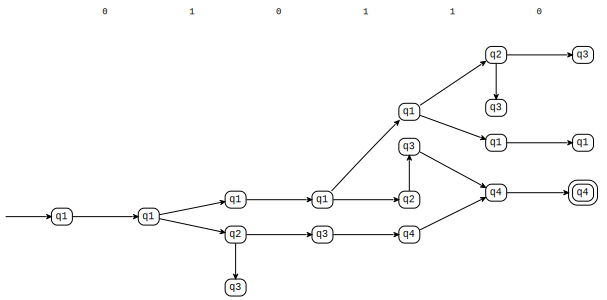

In [13]:
run(n1, "0 1 0 1 1 0")

Now the run graph (basically the same as Figure 1.29 but rotated 90 degrees) looks more complicated: because of nondeterminism, the graph has branches and there is more than one node at each time step. Also, because of epsilon transitions, there are edges within time steps.

In order for an NFA to accept a string, only one path needs to accept it. The other paths can dead-end, or they can even loop forever, like this:

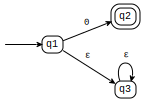

In [14]:
n = read_csv("nfa-loop.csv")
to_graph(n)

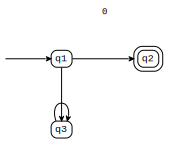

In [15]:
run(n, "0")

Intuitively, this means that when one of the branches of the computation hits an accept state, all the other branches can quit. But if none of the branches hit an accept state, then how do we know when to kill a looping branch?

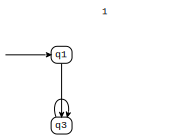

In [16]:
run(n, "1")

The point of this digression is just to reinforce the caution not to try to think of NFAs as physical machines. But they are very useful mathematical concepts.

**Question.** Last time, we saw how, if a DFA recognizes language $L$, then flipping the accept and non-accept states causes it to recognize $L^C$. Do the same thing to $N_1$ and see what language it recognizes. What happened?

More example NFAs from the book:

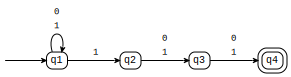

In [17]:
n2 = read_csv('nfa-n2.csv')
n2

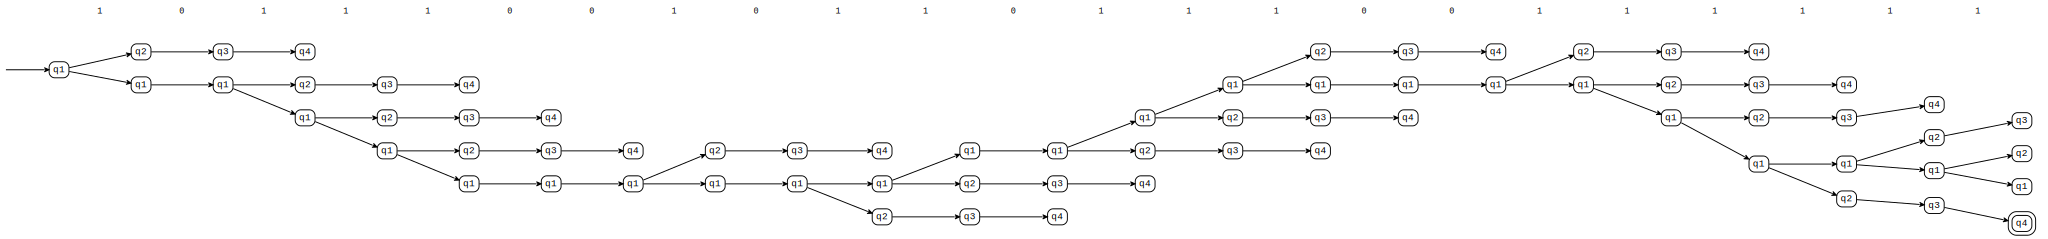

In [27]:
run(n2, "1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1")

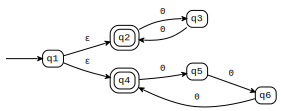

In [18]:
n3 = read_csv('nfa-n3.csv')
n3

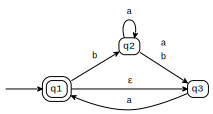

In [19]:
n4 = read_csv('nfa-n4.csv')
n4

## Equivalence with DFA

NFAs seem like they might be a lot more powerful than DFAs, in the sense that they might accept more languages than DFAs do. (Recall: the question is not whether NFAs can accept more _strings_, because clearly we can design either a DFA or a NFA that accepts all strings. The question is whether NFAs can accept more _languages_.) Perhaps surprisingly, the answer is no. Any NFA can be converted to an equivalent DFA by what is commonly known as the _subset construction_.

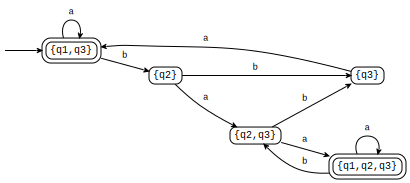

In [20]:
n4 = read_csv('nfa-n4.csv')
d4 = determinize(n4)
to_graph(d4)

Let's run the determinized automaton on a string and compare it with the run of the nondeterministic automaton on the same string. Do you see how they relate to each other?

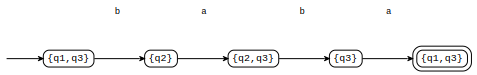

In [21]:
run(d4, "b a b a")

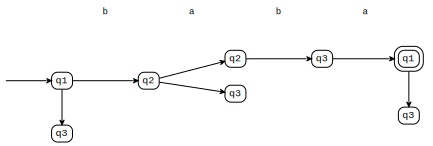

In [22]:
run(n4, "b a b a")